<a href="https://colab.research.google.com/github/woojinhong03/My_study_in_2022_python/blob/main/bus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import lightgbm as lgb
import folium

plt.rc('font', family='NanumBarunGothic') 

In [4]:
train = pd.read_csv("/content/drive/MyDrive/Kaggle Study/버스 운행시간/train.csv")

In [5]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


- id : 데이터의 고유 id
- date : 버스 운행 날짜 
- route_id : 버스 노선 ID
- vh_id : 버스 ID
- route_nm : 버스 노선 번호
- now_larirude : 정류장의 위도
- now_longitude : 정류장의 경도
- now_station : 정류장 이름
- now_arrive_time : 현재 정류장에 도착한 시간
- distance : 현재 정류장에서 다음 정류장까지 실제 이동한 거리
- next_station : 다음 정류장 이름
- next_latitude : 다음 정류장 위도
- next_longitude : 다음 정류장 경도
- next_arrive_time : 다음 정류장에 도착할 때 까지 걸린 시간 (예측 데이터)

In [6]:
train.isnull().sum()

id                  0
date                0
route_id            0
vh_id               0
route_nm            0
now_latitude        0
now_longitude       0
now_station         0
now_arrive_time     0
distance            0
next_station        0
next_latitude       0
next_longitude      0
next_arrive_time    0
dtype: int64

In [7]:
map_data = train[['route_id','now_latitude','now_longitude','now_station']]
map_bus_route = map_data[map_data['route_id'] == 405328102].drop_duplicates("now_station")


map_osm = folium.Map(location=[33.4134, 126.5190], zoom_start = 10.5)


for item in map_bus_route.index:
    lat = map_bus_route.loc[item,'now_latitude']
    long = map_bus_route.loc[item,'now_longitude']
    
    folium.Marker([lat,long], popup = map_bus_route.loc[item,'now_station'],
                      icon = folium.Icon(color = 'red', icon = 'info-sign')
                      ).add_to(map_osm)

map_osm.save('index.html')

map_osm

In [8]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [9]:
train['now_arrive_time'] = train['now_arrive_time'].str.slice(stop = -1).astype('int')

In [10]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,6,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,6,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,6,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),6,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,7,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21,223.0,평생학습관,33.249504,126.558068,38


In [11]:
test = pd.read_csv("/content/drive/MyDrive/Kaggle Study/버스 운행시간/test.csv")
test['now_arrive_time'] = test['now_arrive_time'].str.slice(stop = -1).astype('int')

In [12]:
features = ['now_latitude','now_longitude','next_latitude','next_longitude','now_arrive_time','distance']
target = 'next_arrive_time'


In [13]:
X = train[features]
y = train[target]

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
model_dict = {
  'linear':LinearRegression(),
  'sgdc':SGDClassifier(loss='log',max_iter=10,random_state=42),
  'rf':RandomForestRegressor(random_state=0,n_jobs=-1),
  'knr':KNeighborsRegressor(),
  'ridge':Ridge(),
  'lasso':Lasso(),
  'tree' : DecisionTreeClassifier()
}

In [18]:
model_result = {}
for key in model_dict.keys():
  model_dict[key].fit(X_train,y_train)
  model_result[key] = model_dict[key].predict(X_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [19]:
model_dict['linear'].score(X_valid, y_valid)

0.22925648063216397

In [20]:
model_dict['rf'].score(X_valid, y_valid)

0.5280070576878482

In [21]:
model_dict['knr'].score(X_valid, y_valid)

0.48095367213827134

In [22]:
model_dict['ridge'].score(X_valid, y_valid)

0.22939215808520597

In [23]:
model_dict['lasso'].score(X_valid, y_valid)

0.2086043711388943

In [24]:
model_dict['sgdc'].score(X_valid, y_valid)

0.005416706262472679

In [25]:
model_dict['tree'].score(X_valid, y_valid)

0.06504799011688682

In [26]:
train_s = []
test_s = []
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train,y_train)
  train_s.append(ridge.score(X_train,y_train))
  test_s.append(ridge.score(X_valid, y_valid))

In [27]:
import numpy as np

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


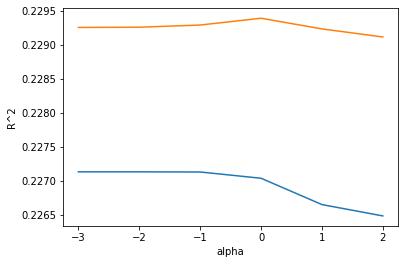

In [28]:
plt.plot(np.log10(alpha_list), train_s)
plt.plot(np.log10(alpha_list), test_s)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
RMSE = mean_squared_error(y_valid, model_result['linear'])**0.5
RMSE

73.99117620617874

In [31]:
RMSE = mean_squared_error(y_valid, model_result['rf'])**0.5
RMSE

57.901890360100474

In [32]:
RMSE = mean_squared_error(y_valid, model_result['knr'])**0.5
RMSE

60.719481133715085

In [33]:
RMSE = mean_squared_error(y_valid, model_result['sgdc'])**0.5
RMSE

86.78984088066545

In [34]:
from sklearn.preprocessing import PolynomialFeatures